In [1]:
import numpy as np
import pandas as pd
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 


In [2]:
df = pd.read_excel(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat3.XLSX''')
df.head()


,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#df = pd.read_csv(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\Student Matematic.XLSX''')
#df.head()


In [ ]:
#df = pd.read_csv(r'''C:\Users\RAPHAEL KUSUMO\Desktop\UTS ML\student-mat.csv''')
#df.head()


In [ ]:
#df.to_excel('Student Matematic.xlsx', index=False)

In [3]:
conditions = [
    (df['G3'] >= 10),
    (df['G3'] <= 9)
        ]
values = ['Passed', 'Failed']
df['Score'] = np.select(conditions, values)
df.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Score
0,0,0,18,1,1,0,4,4,0,4,...,3,4,1,1,3,6,5,6,6,Failed
1,0,0,17,1,1,1,1,1,0,1,...,3,3,1,1,3,4,5,5,6,Failed
2,0,0,15,1,0,1,1,1,0,1,...,3,2,2,3,3,10,7,8,10,Passed
3,0,0,15,1,1,1,4,2,2,3,...,2,2,1,1,5,2,15,14,15,Passed
4,0,0,16,1,1,1,3,3,1,1,...,3,2,1,2,5,4,6,10,10,Passed


In [4]:
df = df.drop([ 'G3'],axis='columns')
df.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Score
0,0,0,18,1,1,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,Failed
1,0,0,17,1,1,1,1,1,0,1,...,5,3,3,1,1,3,4,5,5,Failed
2,0,0,15,1,0,1,1,1,0,1,...,4,3,2,2,3,3,10,7,8,Passed
3,0,0,15,1,1,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,Passed
4,0,0,16,1,1,1,3,3,1,1,...,4,3,2,1,2,5,4,6,10,Passed


In [5]:
inputs = df.drop('Score',axis='columns')
target = df['Score']
inputs.head()

,school,sex,age,add0ess,famsize,Ps101us,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,1,0,4,4,0,4,...,1,4,3,4,1,1,3,6,5,6
1,0,0,17,1,1,1,1,1,0,1,...,1,5,3,3,1,1,3,4,5,5
2,0,0,15,1,0,1,1,1,0,1,...,1,4,3,2,2,3,3,10,7,8
3,0,0,15,1,1,1,4,2,2,3,...,0,3,2,2,1,1,5,2,15,14
4,0,0,16,1,1,1,3,3,1,1,...,1,4,3,2,1,2,5,4,6,10


In [6]:
from sklearn.model_selection import train_test_split # Import train_test_split function
pred_train, pred_test, tar_train, tar_test = train_test_split(inputs, target, test_size=0.25, random_state=0)

In [7]:
tar_train.value_counts()

Passed    203
Failed     93
Name: Score, dtype: int64

In [8]:
tar_test.value_counts()


Passed    62
Failed    37
Name: Score, dtype: int64

In [9]:
model = DecisionTreeClassifier(random_state=0)
classifier = model.fit(pred_train,tar_train)
classifier

DecisionTreeClassifier(random_state=0)

In [10]:
# feature importance
classifier.feature_importances_

array([0.        , 0.        , 0.0124052 , 0.        , 0.02027158,
       0.        , 0.        , 0.        , 0.00470364, 0.03480224,
       0.0117591 , 0.        , 0.        , 0.03222864, 0.01393671,
       0.00955617, 0.        , 0.        , 0.01194575, 0.        ,
       0.        , 0.        , 0.        , 0.02027158, 0.00723218,
       0.        , 0.        , 0.00365839, 0.        , 0.03066965,
       0.06078033, 0.72577885])

In [11]:
predictions = classifier.predict(pred_test)
predictions

array(['Passed', 'Passed', 'Passed', 'Passed', 'Passed', 'Passed',
       'Passed', 'Passed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Passed', 'Failed', 'Passed',
       'Failed', 'Passed', 'Failed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Passed', 'Failed', 'Passed',
       'Failed', 'Passed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Passed', 'Failed', 'Passed',
       'Failed', 'Failed', 'Passed', 'Failed', 'Passed', 'Failed',
       'Passed', 'Passed', 'Failed', 'Passed', 'Passed', 'Failed',
       'Passed', 'Passed', 'Failed', 'Passed', 'Passed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Passed', 'Failed', 'Passed',
       'Passed', 'Passed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Passed', 'Passed',
       'Failed', 'Failed', 'Failed', 'Failed', 'Failed', 'Passed',
       'Passed', 'Passed', 'Passed', 'Passed', 'Passed', 'Fail

In [12]:
#accuracy tanpa tuning
from sklearn import metrics
print(metrics.accuracy_score(tar_test, predictions))

0.8383838383838383


              precision    recall  f1-score   support

      Failed       0.80      0.76      0.78        37
      Passed       0.86      0.89      0.87        62

    accuracy                           0.84        99
   macro avg       0.83      0.82      0.83        99
weighted avg       0.84      0.84      0.84        99

[[28  9]
 [ 7 55]]


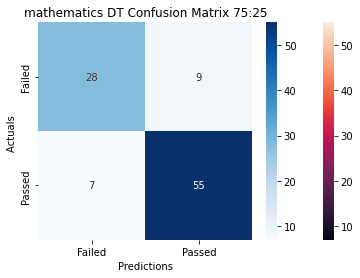

In [13]:
#Get the confusion matrix tanpa bagging
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
print(classification_report(tar_test, predictions))

cf_matrix1 = confusion_matrix(tar_test, predictions)
print(cf_matrix1)

import seaborn as sns
sns.heatmap(cf_matrix1, annot=True)
ax = sns.heatmap(cf_matrix1, annot=True,fmt="d", cmap='Blues')

ax.set_title('mathematics DT Confusion Matrix 75:25');
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals ');

ax.xaxis.set_ticklabels(['Failed', 'Passed'])
ax.yaxis.set_ticklabels(['Failed', 'Passed'])
plt.show()

In [14]:
# MCC score 1 Decision tree tanpa bagging
from sklearn.metrics import matthews_corrcoef
mcc_score = matthews_corrcoef(tar_test, predictions)
print("Matthews Correlation Coefficient:", mcc_score)

Matthews Correlation Coefficient: 0.6515680486107015


In [ ]:
#print("accuracy of training dataset is{:.2f}".format(classifier.score(pred_train,tar_train)))
#print("accuracy of test dataset is {:.2f}".format(classifier.score(pred_test,tar_test)))
#accuracy
#print("Accuracy is",accuracy_score(tar_test, predictions, normalize = True))

In [ ]:
# Untuk Gridsearch tuning parameter
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RandomizedSearchCV
#Parameters = {'max_depth' : (1,2,3,4,5,6,7,8,9),
             'criterion' : ('gini', 'entropy'),
              'max_features' : ('auto', 'sqrt', 'log2'),
             'min_samples_split' : (2,3,4,5,6,7,8,9,10,11,12,13,14,16,18,20)
             }

#DT_grid = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), param_distributions = Parameters, cv = 2)
#DT_grid.fit(pred_train,tar_train)
#DT_grid.best_estimator_

In [ ]:
# untuk visualisasi pohon tunggal
#import pandas as pd
#from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
#Jangan lupa ganti judul dari file pdf
#dot_data = export_graphviz(model,
                          out_file=None,
                          feature_names= inputs.columns,
                          class_names=['Passed', 'Failed'],
                          filled=True, rounded=True,
                          special_characters=True)
#graph = graphviz.Source(dot_data)  
#graph.render("student tree Binary Matematics") 

Accuracy: 0.9393939393939394
              precision    recall  f1-score   support

      Failed       0.92      0.92      0.92        37
      Passed       0.95      0.95      0.95        62

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99

Matthews Correlation Coefficient: 0.8705318221447254
[[34  3]
 [ 3 59]]


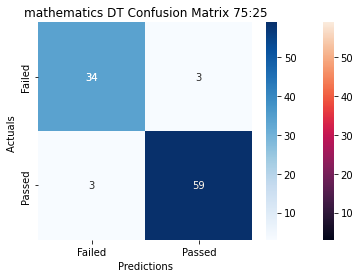

In [15]:
# Make bagging classifier
from sklearn.ensemble import BaggingClassifier


# Create a Decision Tree classifier
gnb_classifier = DecisionTreeClassifier(max_depth=150, max_features='log2', min_samples_split=16,
                       random_state=0)

# Create a BaggingClassifier with Gaussian Naive Bayes as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=gnb_classifier, n_estimators=5, random_state=0)

# Train the BaggingClassifier on the training data
bagging_classifier.fit(pred_train, tar_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(pred_test)

# Calculate accuracy
accuracy = accuracy_score(tar_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import classification_report

print(classification_report(tar_test, y_pred))

from sklearn.metrics import matthews_corrcoef


mcc_score = matthews_corrcoef(tar_test, y_pred)
print("Matthews Correlation Coefficient:", mcc_score)

#Get the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(tar_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

ax = sns.heatmap(cf_matrix, annot=True,fmt="d", cmap='Blues')

ax.set_title('mathematics DT Confusion Matrix 75:25');
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals ');

ax.xaxis.set_ticklabels(['Failed', 'Passed'])
ax.yaxis.set_ticklabels(['Failed', 'Passed'])
plt.show()



In [16]:
#Program untuk download Tree hasil  bagging classifier
from sklearn.tree import export_graphviz
import graphviz 
import os

# (Visualizations decision tree) ...

# Create a directory to store the visualizations
output_directory = "tree_visualizations"
os.makedirs(output_directory, exist_ok=True)

# Access and visualize individual trees
for i, tree in enumerate(bagging_classifier.estimators_):
    # 1. Ekspor ke string DOT (BUKAN ke file)
    dot_data = export_graphviz(
        tree, 
        feature_names=inputs.columns, 
        class_names=['Passed', 'Failed'], 
        filled=True, 
        rounded=True, 
        out_file=None # Pastikan out_file diset None agar hasilnya berupa string
    )
    
    # 2. Render DOT string menjadi objek Source Graphviz
    graph = graphviz.Source(dot_data)
    
    # 3. Simpan dan render file. 'format' menentukan output (pdf, png, svg, dll.)
    # 'filename' menentukan nama dasar file DOT, dan 'directory' tempat menyimpan output.
    graph.render(
        filename=f'tree_{i}', 
        directory=output_directory, 
        format='pdf', # MEnentukan Format Output (misalnya 'pdf')
        view=False,
        cleanup=True # Menghapus file DOT sementara
    )

print(f"Visualisasi pohon telah disimpan sebagai file PDF di direktori: {output_directory}")

Visualisasi pohon telah disimpan sebagai file PDF di direktori: tree_visualizations
